In [19]:
import os
import sys
from pathlib import Path
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy as cpy
import datetime as dt

In [9]:
DATA_DIR = "/gws/nopw/j04/kscale/USERS/dship/LoSSETT_out/"
simid = 'CTC5RAL'
n_scales = 32
fpath_mean = os.path.join(
        DATA_DIR,
        f"DR_test_{simid}_Nl_{n_scales}_time-mean.nc"
    )

if not os.path.exists(fpath_mean):
    print('mean file doesnt exist - compute')

In [10]:
ds_DR_mean = xr.open_dataset(fpath_mean)
ds_DR_mean

<xarray.Dataset> Size: 294MB
Dimensions:                  (length_scale: 32, latitude: 133, longitude: 720,
                              pressure: 12)
Coordinates:
  * length_scale             (length_scale) float64 256B 5.5e+04 ... 1.76e+06
    forecast_reference_time  datetime64[ns] 8B ...
  * latitude                 (latitude) float64 1kB -40.0 -39.5 ... 25.5 26.0
  * longitude                (longitude) float64 6kB -180.0 -179.5 ... 179.5
  * pressure                 (pressure) float32 48B 100.0 150.0 ... 925.0 1e+03
Data variables:
    DR_indicator             (length_scale, latitude, pressure, longitude) float64 294MB ...

In [11]:
DR_mean = ds_DR_mean['DR_indicator']
DR_mean

<xarray.DataArray 'DR_indicator' (length_scale: 32, latitude: 133,
                                  pressure: 12, longitude: 720)> Size: 294MB
[36771840 values with dtype=float64]
Coordinates:
  * length_scale             (length_scale) float64 256B 5.5e+04 ... 1.76e+06
    forecast_reference_time  datetime64[ns] 8B ...
  * latitude                 (latitude) float64 1kB -40.0 -39.5 ... 25.5 26.0
  * longitude                (longitude) float64 6kB -180.0 -179.5 ... 179.5
  * pressure                 (pressure) float32 48B 100.0 150.0 ... 925.0 1e+03

##### Banding of $\mathcal{D}_\ell$ to quantify energy *into* a band of scales. Logic is:

$\Delta\mathcal{D}_{\ell}(\ell_1,\ell_2) = \mathcal{D}_{\ell_1} - \mathcal{D}_{\ell_2}$ for $\ell_1 > \ell_2$

At the upper and lower bounds of $\ell$:

$\Delta\mathcal{D}_\ell(\ell_{min},0) = \mathcal{D}_{\ell_{min}} \ ;$

$\Delta\mathcal{D}_\ell(\infty,\ell_{max}) = -\mathcal{D}_{\ell_{max}}.$

In [13]:
ell_band_S = [110000]
ell_band_M = [110000, 440000]
ell_band_L = [440000, 1100000]
ell_band_XL = [1100000]

In [15]:
delta_DR_S = DR_mean.sel(length_scale=ell_band_S[0])
delta_DR_M = DR_mean.sel(length_scale=ell_band_M[-1]) - DR_mean.sel(length_scale=ell_band_M[0])
delta_DR_L = DR_mean.sel(length_scale=ell_band_L[-1]) - DR_mean.sel(length_scale=ell_band_L[0])
delta_DR_XL = -DR_mean.sel(length_scale=ell_band_XL[0])

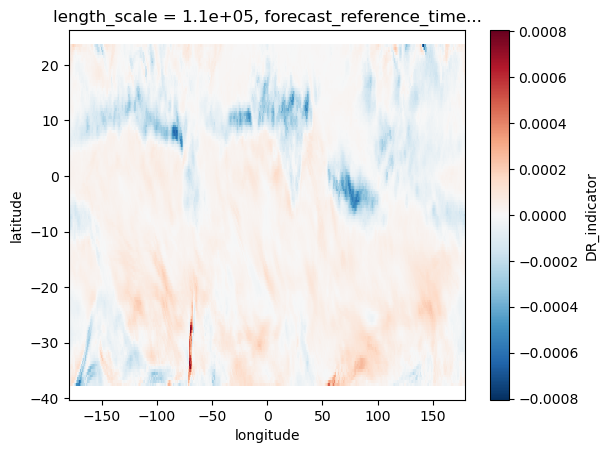

In [28]:
delta_DR_M.sel(pressure=200).plot()

##### Plotting I: Banded $\mathcal{D}_\ell$ vs. $\ell$

Text(0.5, 0, 'Scale range (km)')

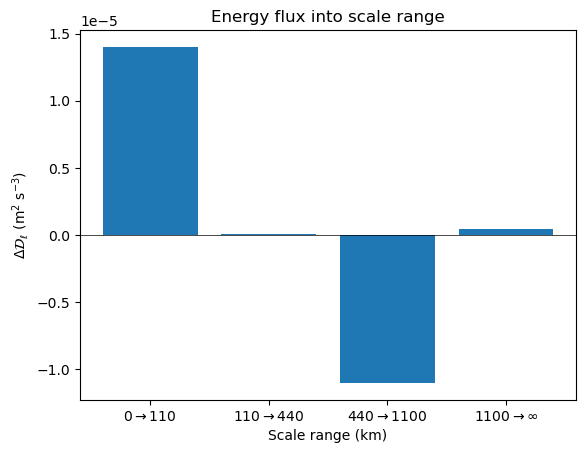

In [44]:
fig,ax = plt.subplots(1,1)
lvl = 850
vals = [delta_DR_S.sel(pressure=lvl,latitude=slice(-15,15)).mean(dim=['latitude','longitude']),\
        delta_DR_M.sel(pressure=lvl,latitude=slice(-15,15)).mean(dim=['latitude','longitude']),\
        delta_DR_L.sel(pressure=lvl,latitude=slice(-15,15)).mean(dim=['latitude','longitude']),\
        delta_DR_XL.sel(pressure=lvl,latitude=slice(-15,15)).mean(dim=['latitude','longitude'])]
sizes = [r'0$\to$110',r'110$\to$440',r'440$\to$1100',r'1100$\to\infty$']
# colors = ['','','','']
ax.bar(sizes,vals)
ax.axhline(0,linewidth=0.5,color='k')
ax.set_title('Energy flux into scale range')
ax.set_ylabel(r'$\Delta\mathcal{D}_\ell$ (m$^2$ s$^{-3}$)')
ax.set_xlabel('Scale range (km)')

##### Plotting II: Maps

In [70]:
np.sin(20*(np.pi/180))

0.3420201433256687